In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('c://Users/Admin/Downloads/train.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df = df.dropna(how="any", axis=1)

In [6]:
df.columns = ['target', 'message']

In [7]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,target,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.shape

(5572, 2)

In [10]:
df.columns

Index(['target', 'message'], dtype='object')

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [14]:
df.nunique()

target        2
message    5169
dtype: int64

In [15]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
df['num_char'] = df['message'].apply(len)
df.head()

,target,message,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df["num_wd"] = df.apply(lambda row: nltk.word_tokenize(row["message"]), axis=1).apply(len)
df["num_sn"] = df.apply(lambda row: nltk.sent_tokenize(row["message"]), axis=1).apply(len)
df.head()

,target,message,num_char,num_wd,num_sn
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df.head()

,target,message,num_char,num_wd,num_sn
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df.describe().T.style.background_gradient(cmap = "Purples_r")

,count,mean,std,min,25%,50%,75%,max
num_char,5169.000000,78.977945,58.236293,2.000000,36.000000,60.000000,117.000000,910.000000
num_wd,5169.000000,18.286129,13.226400,1.000000,9.000000,15.000000,26.000000,219.000000
num_sn,5169.000000,1.961308,1.432583,1.000000,1.000000,1.000000,2.000000,38.000000


## EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [20]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [21]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

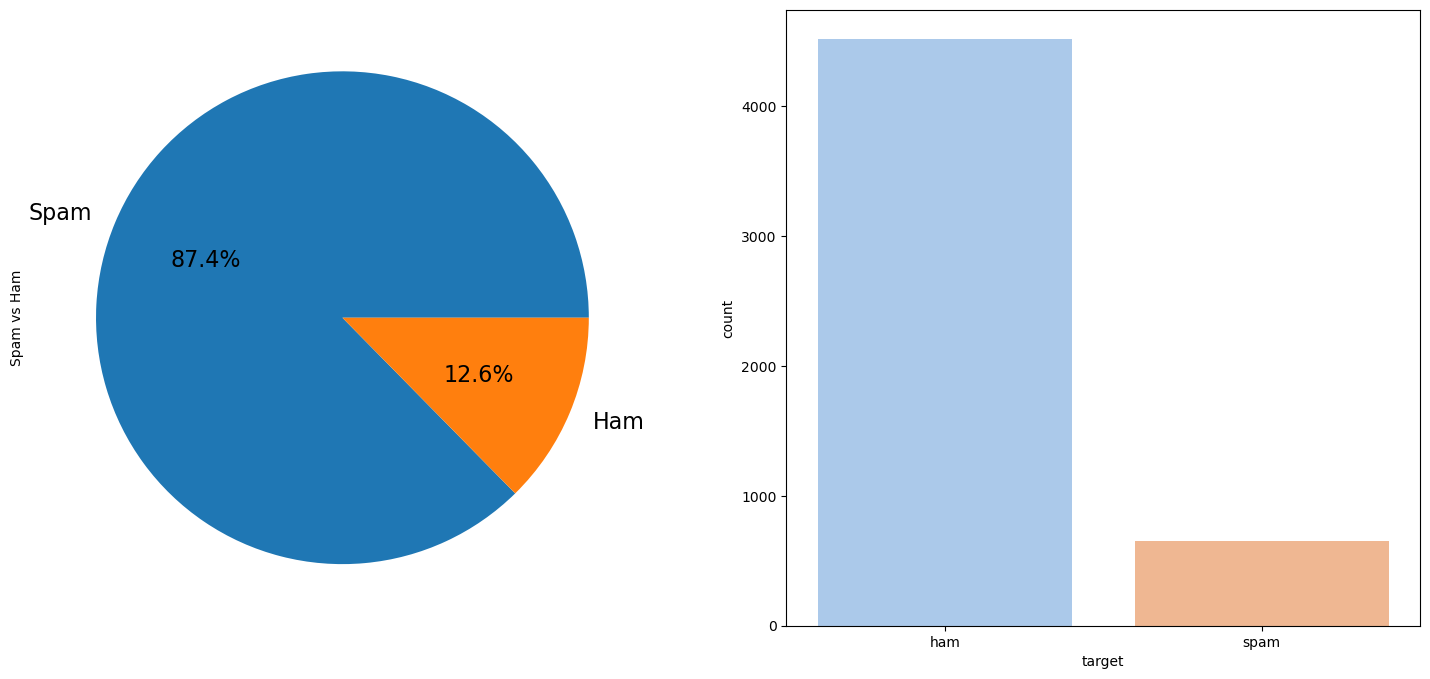

In [22]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.target.value_counts().plot(kind="pie",
                          fontsize=16,                  
                          labels=["Spam", "Ham"],
                          ylabel="Spam vs Ham",
                          autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="target",data=df, palette="pastel")
plt.show()

In [23]:
balance_counts = df.groupby('target')['target'].agg('count').values
balance_counts

array([4516,  653])

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['ham'],
    y=[balance_counts[0]],
    name='ham',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color= 'blue'
))
fig.add_trace(go.Bar(
    x=['spam'],
    y=[balance_counts[1]],
    name='spam',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color= 'red'
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>'
)
fig.show()

In [25]:
ham_df = df[df['target'] == 'ham']['num_wd'].value_counts().sort_index()
spam_df = df[df['target'] == 'spam']['num_wd'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_df.index,
    y=ham_df.values,
    name='ham',
    fill='tozeroy',
    marker_color= 'blue',
))
fig.add_trace(go.Scatter(
    x=spam_df.index,
    y=spam_df.values,
    name='spam',
    fill='tozeroy',
    marker_color= 'red',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Distribution in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

<AxesSubplot:title={'center':'Comparision between the classes'}, xlabel='target'>

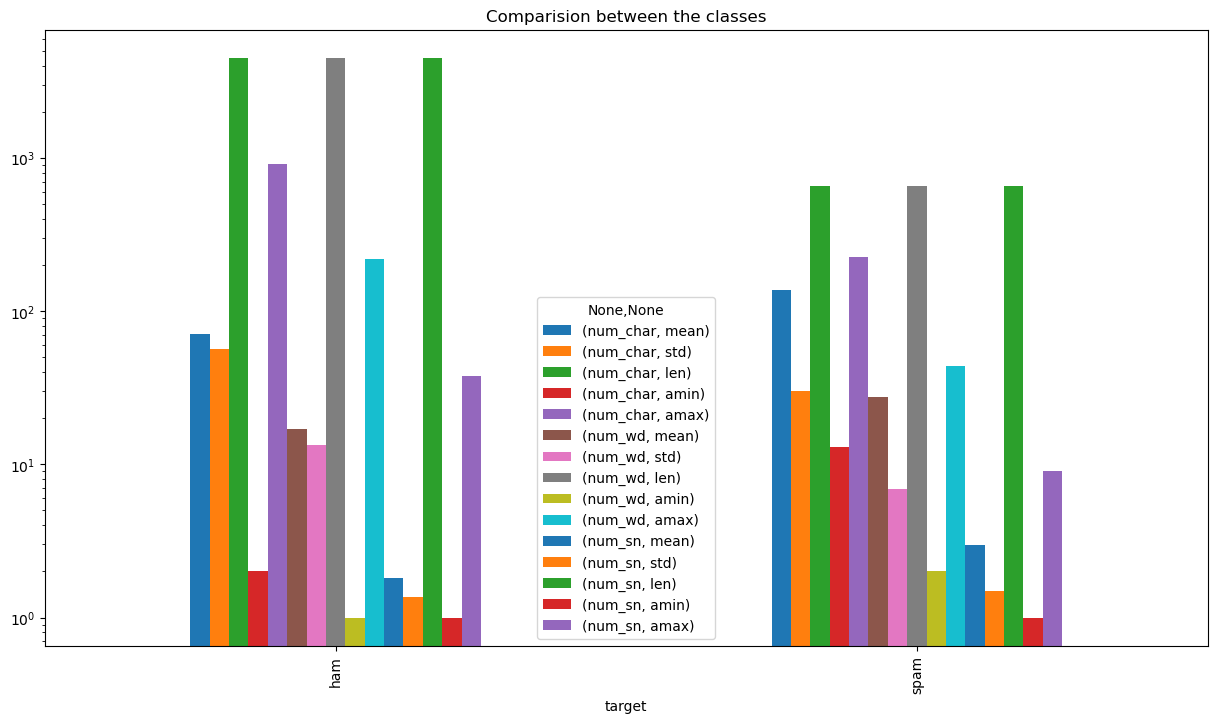

In [26]:
#https://www.kaggle.com/code/casper6290/sms-spam-ham-99-acc?cellIds=29&kernelSessionId=101302412
import numpy as np
view=df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])
view.plot(kind='bar',figsize=(15,8),title='Comparision between the classes',logy=True)

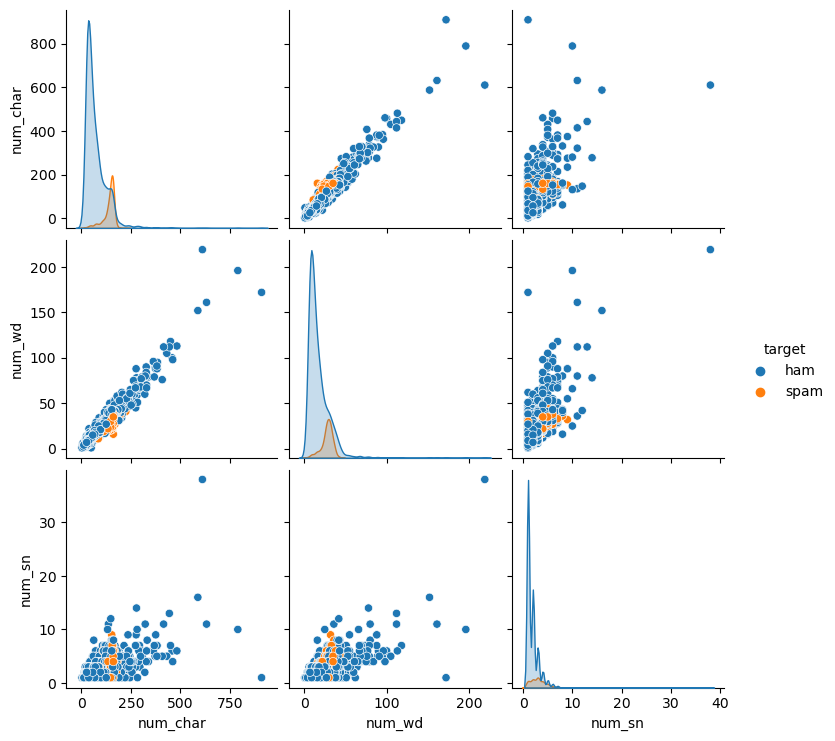

In [27]:
sns.pairplot(df,hue='target')

## Data PreProcessing

### Lowercasing

In [28]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [29]:
df['new_message'] = df.message.apply(lambda x: clean_text(x))

### Removing Punctuation

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df['new_message']= df['new_message'].apply(lambda x:remove_punctuation(x))

### Tokenization

In [32]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
df['new_message']= df['new_message'].apply(lambda x: tokenization(x))

### Removing Stopwords

In [33]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [34]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [35]:
df['new_message']= df['new_message'].apply(lambda x:remove_stopwords(x))

### Stemming

In [36]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [37]:
def stemming(text):
    stem_text = "".join([porter_stemmer.stem(word) for word in text])
    return stem_text
df['new_message']=df['new_message'].apply(lambda x: stemming(x))

### Lemmatization

In [38]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from spacy import load

In [39]:
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


In [40]:
! ls /usr/share/nltk_data/corpora/

abc			 kimmo.zip		sentiwordnet
abc.zip			 knbc.zip		sentiwordnet.zip
alpino			 lin_thesaurus		shakespeare
alpino.zip		 lin_thesaurus.zip	shakespeare.zip
biocreative_ppi		 mac_morpho		sinica_treebank
biocreative_ppi.zip	 mac_morpho.zip		sinica_treebank.zip
brown			 machado.zip		smultron
brown.zip		 masc_tagged.zip	smultron.zip
brown_tei		 movie_reviews		state_union
brown_tei.zip		 movie_reviews.zip	state_union.zip
cess_cat		 mte_teip5		stopwords
cess_cat.zip		 mte_teip5.zip		stopwords.zip
cess_esp		 names			subjectivity
cess_esp.zip		 names.zip		subjectivity.zip
chat80			 nps_chat		swadesh
chat80.zip		 nps_chat.zip		swadesh.zip
city_database		 omw.zip		switchboard
city_database.zip	 opinion_lexicon	switchboard.zip
cmudict			 opinion_lexicon.zip	timit
cmudict.zip		 paradigms		timit.zip
comtrans.zip		 paradigms.zip		toolbox
conll2000		 pil			toolbox.zip
conll2000.zip		 pil.zip		treebank
conll2002		 pl196x			treebank.zip
conll2002.zip		 pl196x.zip		twitter_samples
conll2007.zip		 ppattach	

In [41]:
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

In [42]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text
df['new_message']=df['new_message'].apply(lambda x:lemmatizer(x))

### Remove of square bracket and words containing words

In [43]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [44]:
df['new_message'] = df.new_message.apply(lambda x: clean_text(x))

In [45]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [46]:
df['new_message'] =  df.new_message.apply(lambda x: lemmatizer(x))

### Remove Urls

In [47]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [48]:
df['new_message'] = df.new_message.apply(lambda x: remove_urls(x))

### Remove digits

In [49]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [50]:
df['new_message'] = df.new_message.apply(lambda x: remove_digits(x))

In [51]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) # Side effect: removes extra spaces
    return(clean_text)

In [52]:
df['new_message'] = df.new_message.apply(lambda x: remove_digits1(x))

### Remove Emoji

In [53]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [54]:
df['new_message'] = df.new_message.apply(lambda x: remove_emojis(x))

In [55]:
df['new_message']

0       jurong point crazy available bugis n great wor...
1                                   ok lar joke wif u oni
2       free entry wkly comp win fa cup final tkts tex...
3                                     u dun early hor u c
4                               nah not think go usf live
                              ...                        
5567    time try contact u u win pound prize claim eas...
5568                             ì b go esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching act like d interested buy week gi...
5571                                            rofl true
Name: new_message, Length: 5169, dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['target'])

df['target_encoded'] = le.transform(df['target'])
df.head()

,target,message,num_char,num_wd,num_sn,new_message,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,jurong point crazy available bugis n great wor...,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts tex...,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun early hor u c,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah not think go usf live,0


In [57]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

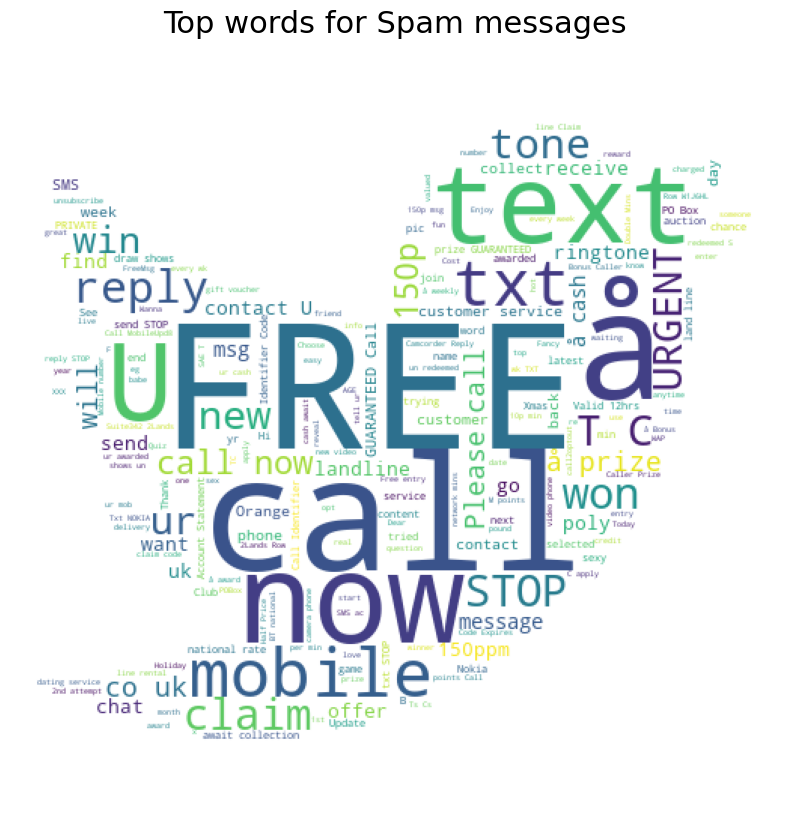

In [58]:
twitter_mask = np.array(Image.open('/kaggle/input/maskwordclud22/Mask-wordcloud/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['target'] == 'spam', 'message']))
plt.figure(figsize=(18,10))
plt.title('Top words for Spam messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

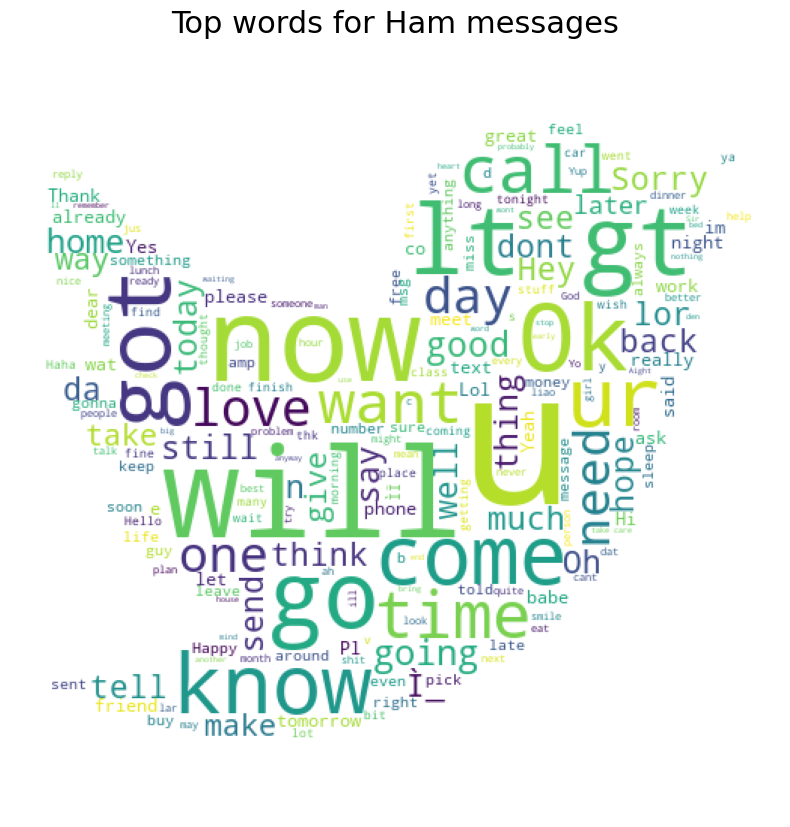

In [59]:
twitter_mask = np.array(Image.open('/kaggle/input/maskwordclud22/Mask-wordcloud/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['target'] == 'ham', 'message']))
plt.figure(figsize=(18,10))
plt.title('Top words for Ham messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

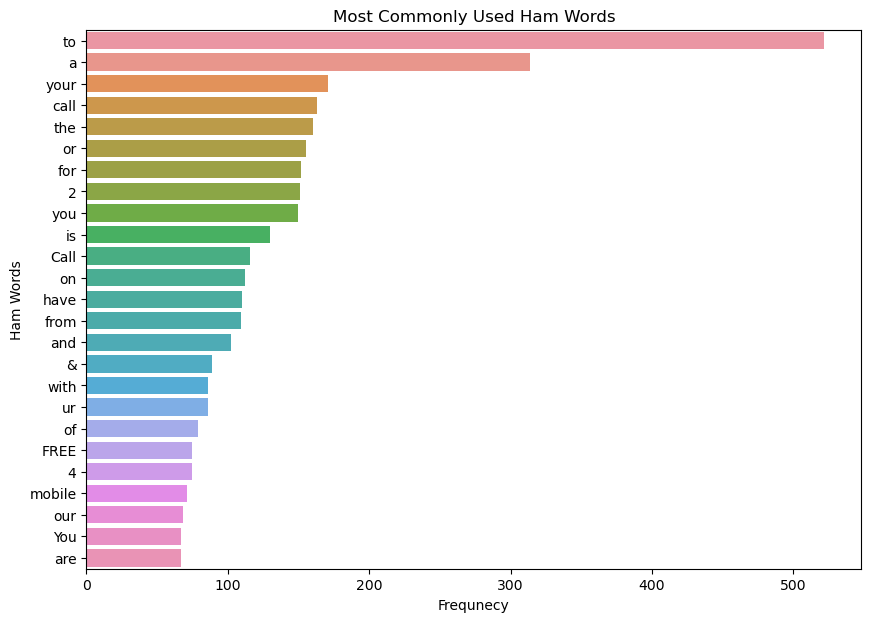

In [60]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#create spam corpus which will holds all Spam words
spam_corpus = []
for msg in df[df['target_encoded'] == 1]['message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

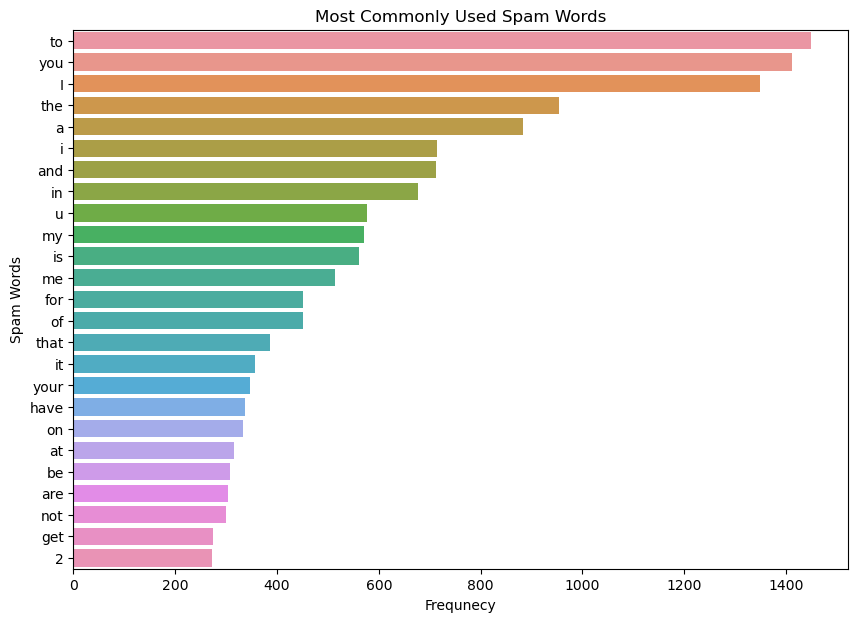

In [61]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#create spam corpus which will holds all Ham or Non Spam words
ham_corpus = []
for msg in df[df['target_encoded'] == 0]['message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()


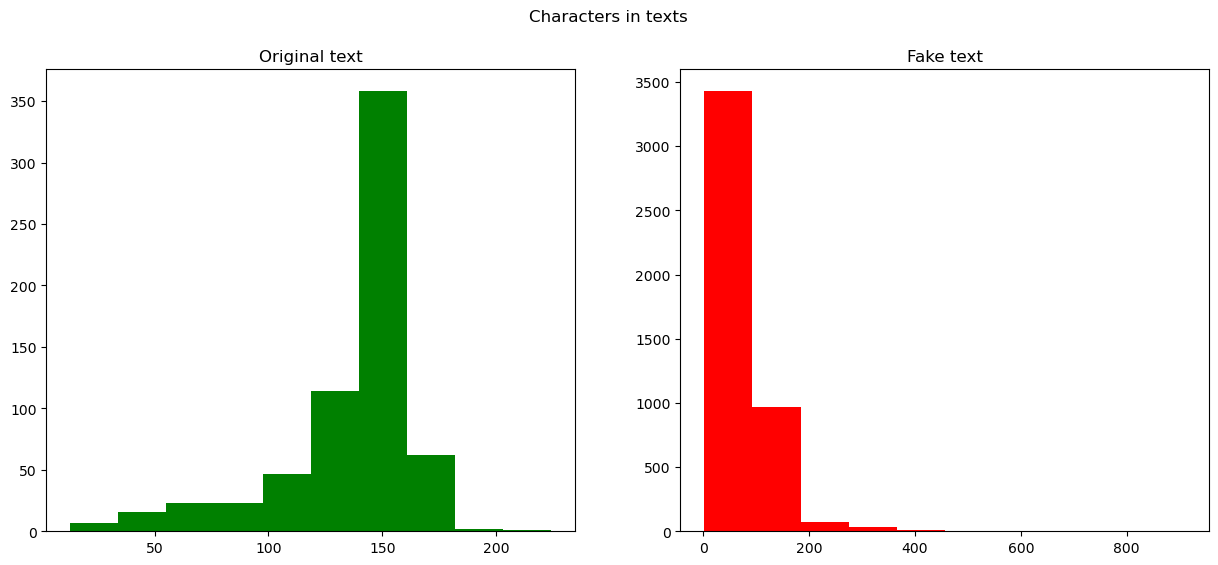

In [62]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#Characters Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['target_encoded']==1]['num_char']
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=df[df['target_encoded']==0]['num_char']
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

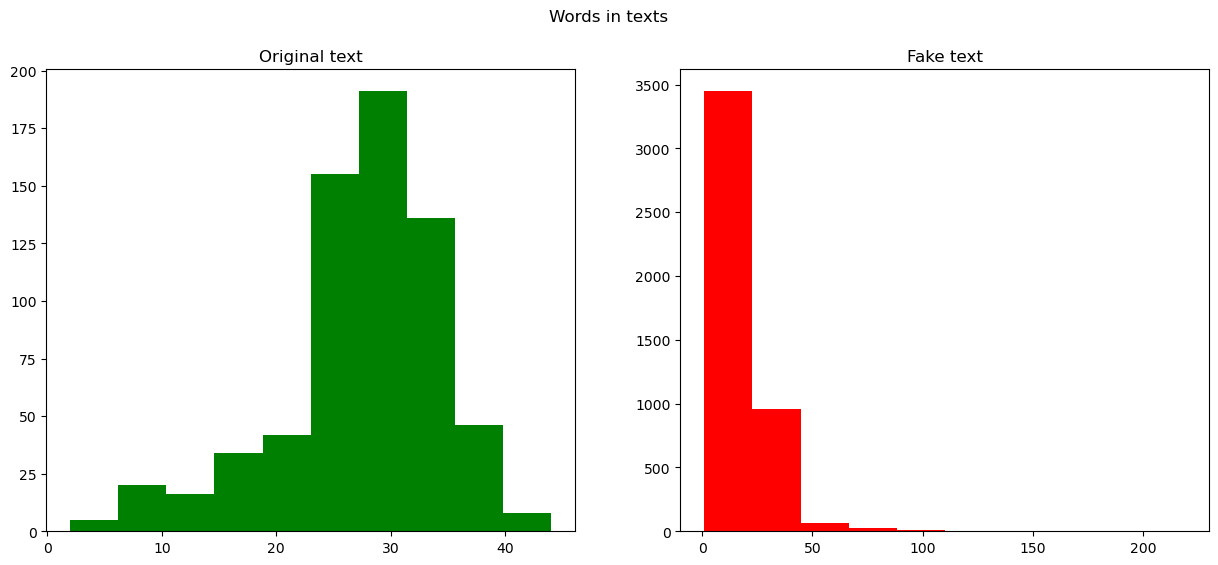

In [63]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#Words Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['target_encoded']==1]['num_wd']
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=df[df['target_encoded']==0]['num_wd']
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

In [64]:
x = df['new_message']
y = df['target_encoded']

print(len(x), len(y))

5169 5169


In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

3876 3876
1293 1293


## Count Vectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [67]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [68]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

## TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<3876x5809 sparse matrix of type '<class 'numpy.float64'>'
	with 26345 stored elements in Compressed Sparse Row format>

In [70]:
texts = df['new_message']
target = df['target_encoded']

In [71]:
from keras.preprocessing.text import Tokenizer

In [72]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

6964

In [73]:
import tensorflow as tf

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [75]:
from nltk.tokenize import word_tokenize

In [76]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[2778,  217,  400, ...,    0,    0,    0],
       [  12,  182,  466, ...,    0,    0,    0],
       [  13,  333,  674, ...,    0,    0,    0],
       ...,
       [6961, 1228, 6962, ...,    0,    0,    0],
       [ 110, 6963, 1355, ...,    0,    0,    0],
       [1699,  355,    0, ...,    0,    0,    0]], dtype=int32)

### GloVe

In [77]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions
# embeddings_dictionary

In [78]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.031087  ,  0.22155   ,  0.44494   , ..., -0.67097002,
         0.24698   , -0.62001002],
       [-0.19103999,  0.17601   ,  0.36919999, ..., -0.59680003,
         0.080843  ,  0.27866   ],
       ...,
       [-0.12201   ,  0.20465   ,  0.53192002, ..., -0.164     ,
        -0.41637   ,  0.66426003],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46118999,  0.3567    ,  0.026078  , ..., -0.0056525 ,
         0.55176002,  0.77563   ]])

## Modelling

In [79]:
import plotly.figure_factory as ff

x_axes = ['Ham', 'Spam']
y_axes =  ['Spam', 'Ham']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [80]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

## Naive Bayes DTM

In [81]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [82]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9752513534416086


## Naive Bayes

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [84]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9551430781129157


## XGBoost

In [85]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        colsample_bytree=0.8,
        subsample=0.7,
        min_child_weight=5,
    ))
])

In [86]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Train: 0.9574303405572755
Test: 0.94276875483372


## RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', RandomForestClassifier(n_estimators=50, random_state=2))])


In [88]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9651972157772621


## SVM

In [89]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', SVC(kernel='sigmoid', gamma=1.0))])

In [90]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9791183294663574


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

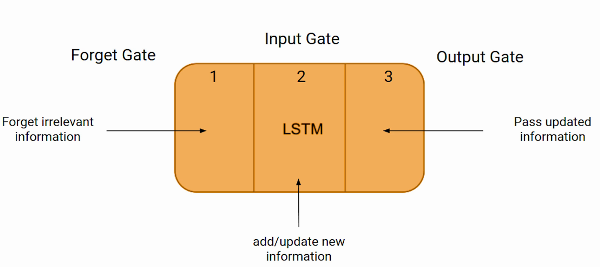

## LSTM

In [92]:
import tensorflow
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [93]:
def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 69, 100)           696400    
                                                                 
 bidirectional (Bidirectiona  (None, 69, 138)          93840     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 138)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 138)              552       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 138)               0         
                                                        

In [94]:
model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 3,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/3
122/122 [==============================] - ETA: 0s - loss: 0.3761 - accuracy: 0.8638
Epoch 1: val_loss improved from inf to 0.32021, saving model to model.h5
122/122 [==============================] - 23s 134ms/step - loss: 0.3761 - accuracy: 0.8638 - val_loss: 0.3202 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 2/3
122/122 [==============================] - ETA: 0s - loss: 0.2140 - accuracy: 0.9223
Epoch 2: val_loss improved from 0.32021 to 0.24257, saving model to model.h5
122/122 [==============================] - 16s 128ms/step - loss: 0.2140 - accuracy: 0.9223 - val_loss: 0.2426 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 3/3
122/122 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9469
Epoch 3: val_loss improved from 0.24257 to 0.20176, saving model to model.h5
122/122 [==============================] - 15s 126ms/step - loss: 0.1673 - accuracy: 0.9469 - val_loss: 0.2018 - val_accuracy: 0.9312 - lr: 0.0010


In [95]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

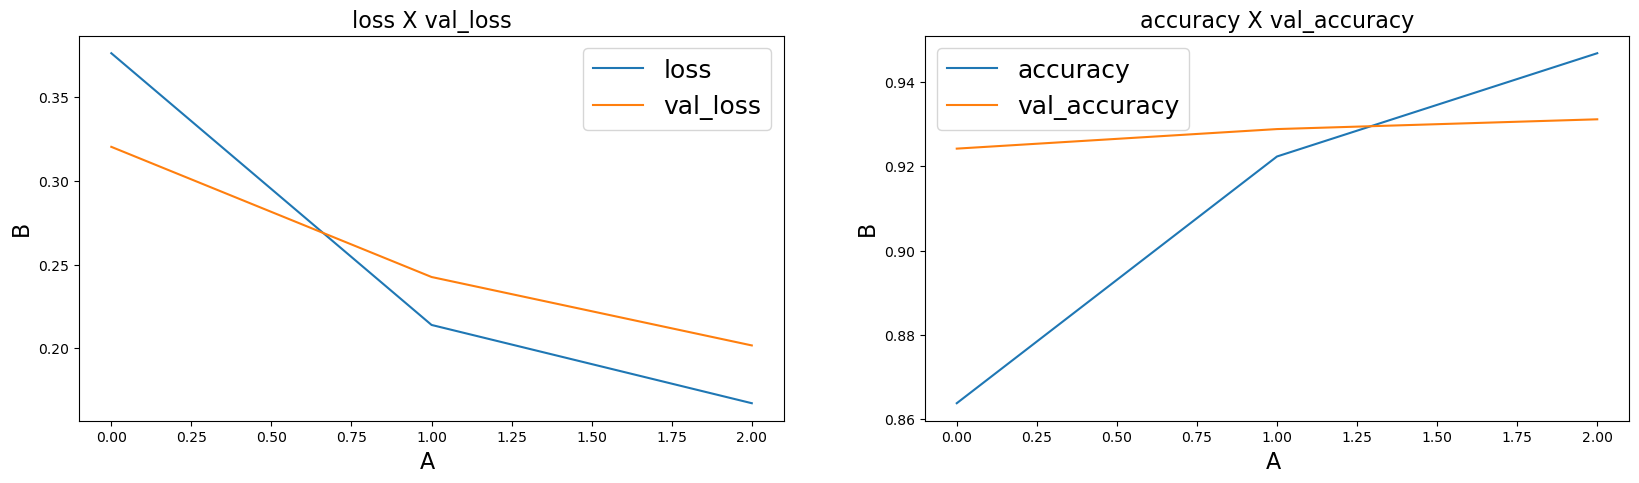

In [96]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [97]:
y_preds = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix(metrics.confusion_matrix(y_test, y_preds))

41/41 [==============================] - 1s 23ms/step


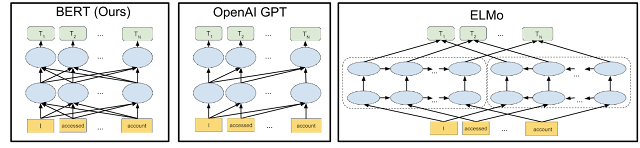

## BERT

In [98]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

In [99]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

In [100]:
def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,

            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)

In [101]:
texts = df['new_message']
target = df['target_encoded']

train_input_ids, train_attention_masks = bert_encode(texts,60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [102]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(bert_model):
    
    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [103]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [104]:
model = create_model(bert_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                            

In [105]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split=0.2, 
    epochs=3,
    batch_size=10
)

Epoch 1/3
414/414 [==============================] - 1769s 4s/step - loss: 0.4240 - accuracy: 0.8687 - val_loss: 0.3536 - val_accuracy: 0.8868
Epoch 2/3
414/414 [==============================] - 1725s 4s/step - loss: 0.4033 - accuracy: 0.8704 - val_loss: 0.3576 - val_accuracy: 0.8868
Epoch 3/3
414/414 [==============================] - 1729s 4s/step - loss: 0.4076 - accuracy: 0.8704 - val_loss: 0.3559 - val_accuracy: 0.8868


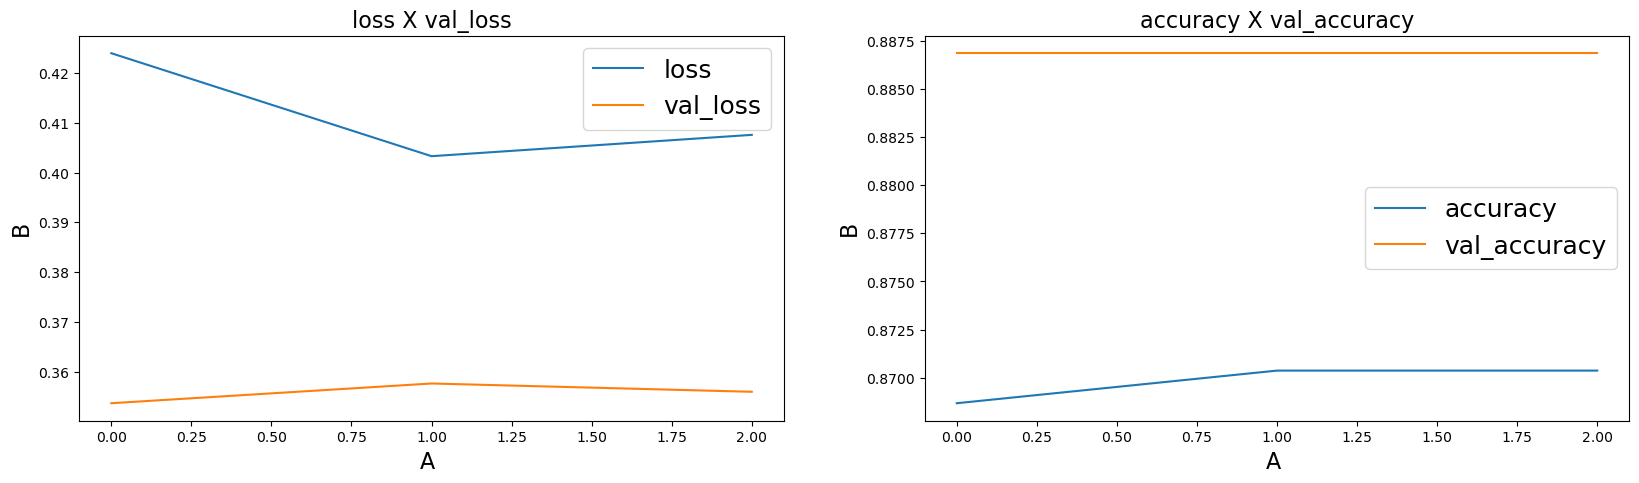

In [106]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])